In [1]:
__author__ = 'racah'
import numpy as np
import os
import pickle
import sys
import h5py
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from util.data_loaders import load_ibd_pairs, get_ibd_data
from nbfinder import NotebookFinder
sys.meta_path.append(NotebookFinder())
from networks.evdcae_net import DenoisingConvAe
from util.helper_fxns import create_run_dir, make_accidentals
from networks.print_n_plot import  calc_plot_n_save_tsne
import logging
import argparse
%matplotlib inline

'''1) Primary AD           10000 or 1
 2) Delayed AD response  01000 or 2
 3) Muon decay           00100 or 3
 4) Flasher              00010 or 4
 5) Other (background noise) 00001 or 5'''




importing Jupyter notebook from networks/evdcae_net.ipynb
importing Jupyter notebook from networks/train_val.ipynb
importing Jupyter notebook from networks/print_n_plot.ipynb
importing Jupyter notebook from util/helper_fxns.ipynb


'1) Primary AD           10000 or 1\n 2) Delayed AD response  01000 or 2\n 3) Muon decay           00100 or 3\n 4) Flasher              00010 or 4\n 5) Other (background noise) 00001 or 5'

In [2]:

# if inside a notebook, then get rid of weird notebook arguments, so that arg parsing still works
if any(["jupyter" in arg for arg in sys.argv]):
    sys.argv=sys.argv[:1]


parser = argparse.ArgumentParser()
parser.add_argument('-e', '--epochs', type=int, default=200,
    help='number of epochs for training')

parser.add_argument('-l', '--learn_rate', default=0.01, type=float,
    help='the learning rate for the network')

parser.add_argument('-n', '--num_ims', default=200, type=int,
    help='number of total images')

parser.add_argument('-f', '--num_filters', default=128, type=int,
    help='number of filters in each conv layer')

parser.add_argument( '--fc', default=1024, type=int,
    help='number of fully connected units')

parser.add_argument('-c','--num_extra_conv', default=0, type=int,
    help='conv layers to add on to each conv layer before max pooling')

parser.add_argument('-b','--batch_size', default=128, type=int,
help='batch size')

parser.add_argument('--momentum', default=0.9, type=float,
    help='momentum')


args = parser.parse_args()


In [3]:
kwargs = dict(args._get_kwargs())

Building model and compiling functions...
(None, 2, 8, 24)
(None, 128, 11, 12)
(None, 128, 6, 6)
(None, 1024)
(None, 4608)
(None, 128, 6, 6)
(None, 128, 11, 12)
(None, 2, 8, 24)
Starting training...


Epoch 1 of 200 took 0.460s
	training los:		0.2319
	training acc:		20.6864 %
  validation loss:		0.220214
  validation accuracy:		22.02 %


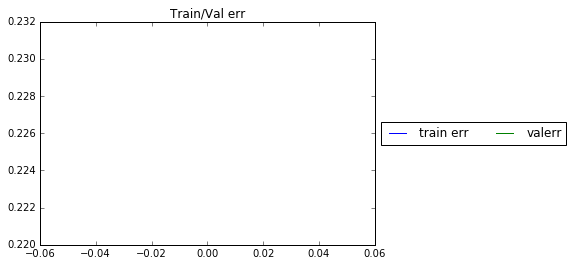

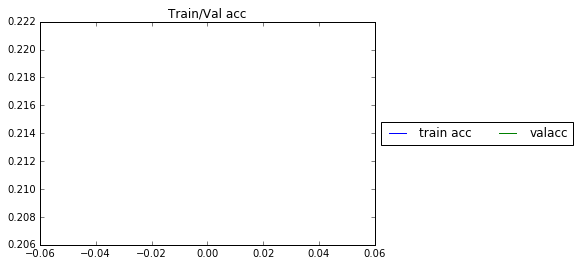

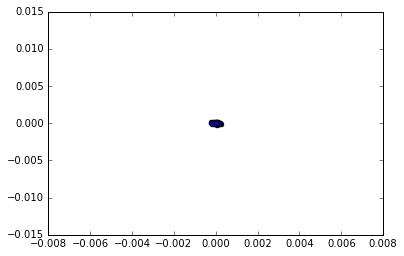

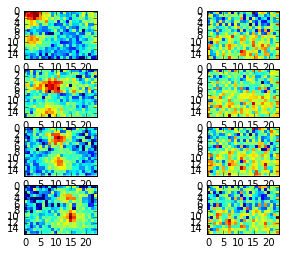

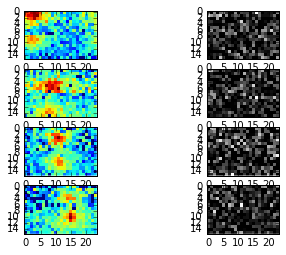

Epoch 2 of 200 took 0.428s
	training los:		0.2068
	training acc:		17.8381 %
Epoch 3 of 200 took 0.424s
	training los:		0.1785
	training acc:		15.1933 %
Epoch 4 of 200 took 0.430s
	training los:		0.1520
	training acc:		13.1130 %
Epoch 5 of 200 took 0.428s
	training los:		0.1310
	training acc:		11.6973 %
Epoch 6 of 200 took 0.422s
	training los:		0.1167
	training acc:		10.8692 %
Epoch 7 of 200 took 0.418s
	training los:		0.1091
	training acc:		10.6414 %
Epoch 8 of 200 took 0.416s
	training los:		0.1067
	training acc:		10.7396 %
Epoch 9 of 200 took 0.413s
	training los:		0.1076
	training acc:		10.9025 %
Epoch 10 of 200 took 0.416s
	training los:		0.1093
	training acc:		11.0582 %
Epoch 11 of 200 took 0.419s
	training los:		0.1107
	training acc:		11.1511 %


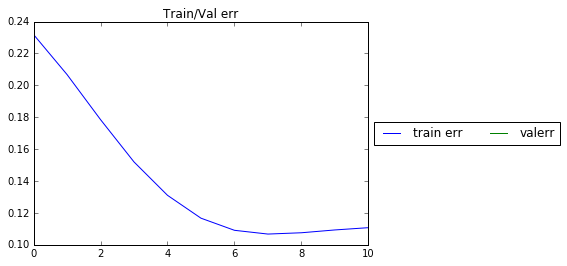

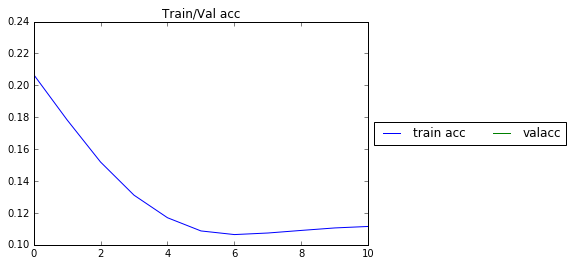

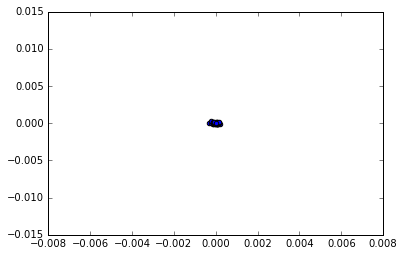

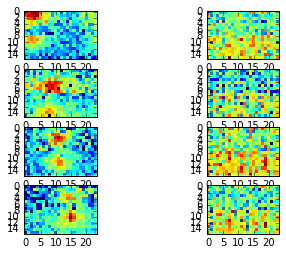

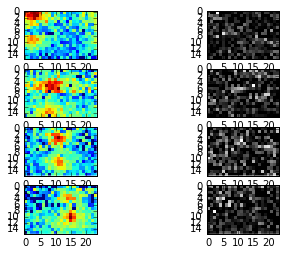

Epoch 12 of 200 took 0.446s
	training los:		0.1114
	training acc:		11.1063 %
Epoch 13 of 200 took 0.443s
	training los:		0.1113
	training acc:		10.9806 %
Epoch 14 of 200 took 0.437s
	training los:		0.1097
	training acc:		10.8000 %
Epoch 15 of 200 took 0.413s
	training los:		0.1076
	training acc:		10.5771 %
Epoch 16 of 200 took 0.415s
	training los:		0.1058
	training acc:		10.3984 %
Epoch 17 of 200 took 0.413s
	training los:		0.1042
	training acc:		10.2526 %
Epoch 18 of 200 took 0.414s
	training los:		0.1024
	training acc:		10.1167 %
Epoch 19 of 200 took 0.416s
	training los:		0.1014
	training acc:		10.0406 %
Epoch 20 of 200 took 0.417s
	training los:		0.0999
	training acc:		9.9602 %
Epoch 21 of 200 took 0.418s
	training los:		0.0995
	training acc:		9.8987 %


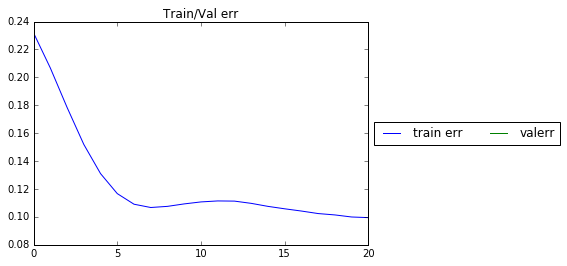

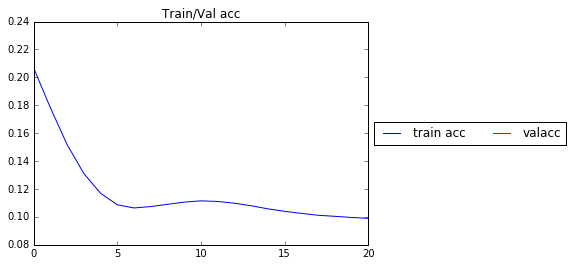

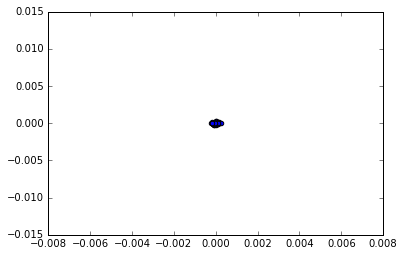

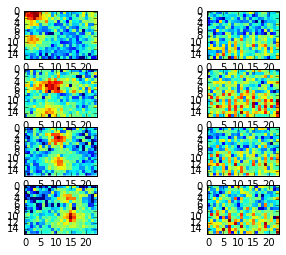

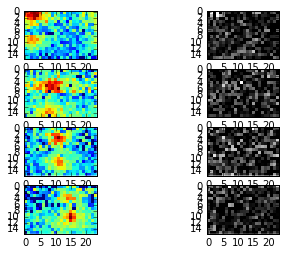

Epoch 22 of 200 took 0.438s
	training los:		0.0990
	training acc:		9.8734 %
Epoch 23 of 200 took 0.415s
	training los:		0.0991
	training acc:		9.8427 %
Epoch 24 of 200 took 0.413s
	training los:		0.0985
	training acc:		9.8136 %
Epoch 25 of 200 took 0.419s
	training los:		0.0983
	training acc:		9.8152 %
Epoch 26 of 200 took 0.415s
	training los:		0.0981
	training acc:		9.7833 %
Epoch 27 of 200 took 0.412s
	training los:		0.0979
	training acc:		9.7859 %
Epoch 28 of 200 took 0.415s
	training los:		0.0980
	training acc:		9.7730 %
Epoch 29 of 200 took 0.409s
	training los:		0.0974
	training acc:		9.7524 %
Epoch 30 of 200 took 0.410s
	training los:		0.0973
	training acc:		9.7310 %
Epoch 31 of 200 took 0.412s
	training los:		0.0972
	training acc:		9.7072 %


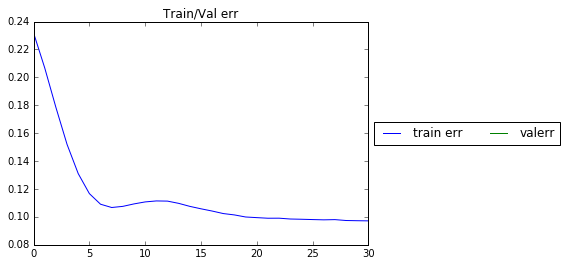

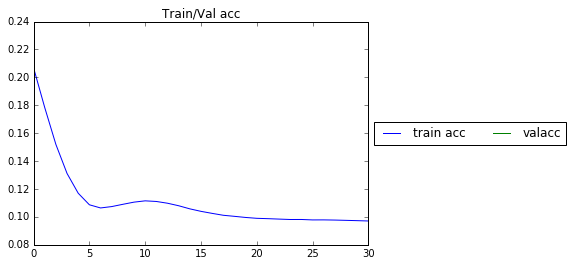

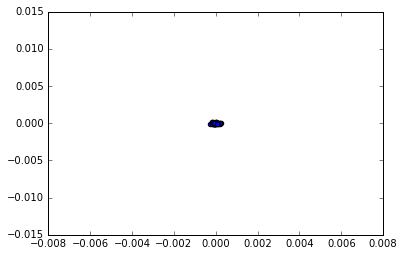

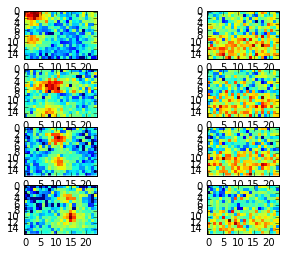

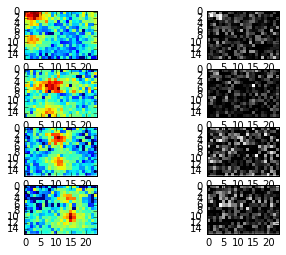

Epoch 32 of 200 took 0.436s
	training los:		0.0970
	training acc:		9.6692 %
Epoch 33 of 200 took 0.429s
	training los:		0.0970
	training acc:		9.6640 %
Epoch 34 of 200 took 0.414s
	training los:		0.0965
	training acc:		9.6641 %
Epoch 35 of 200 took 0.413s
	training los:		0.0965
	training acc:		9.6205 %
Epoch 36 of 200 took 0.426s
	training los:		0.0963
	training acc:		9.6145 %
Epoch 37 of 200 took 0.415s
	training los:		0.0961
	training acc:		9.6069 %
Epoch 38 of 200 took 0.411s
	training los:		0.0962
	training acc:		9.5754 %
Epoch 39 of 200 took 0.411s
	training los:		0.0959
	training acc:		9.5810 %
Epoch 40 of 200 took 0.410s
	training los:		0.0955
	training acc:		9.5402 %
Epoch 41 of 200 took 0.413s
	training los:		0.0960
	training acc:		9.5411 %


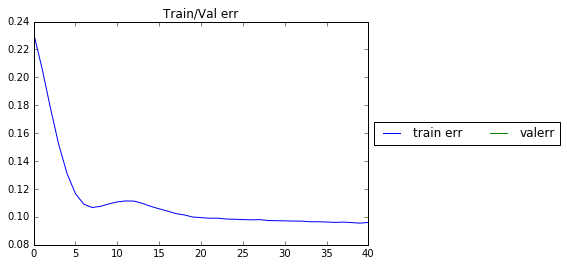

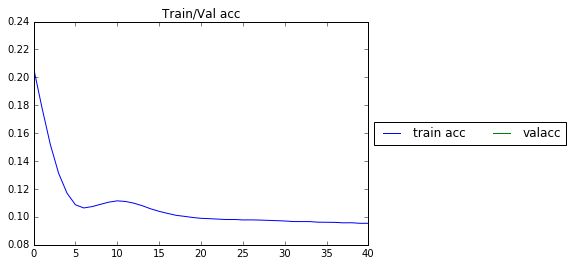

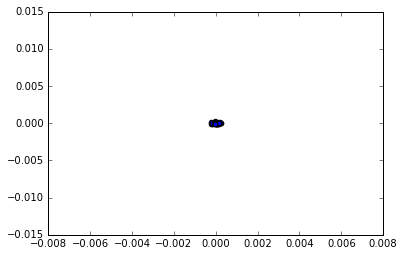

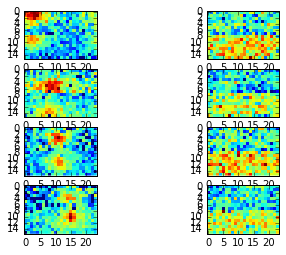

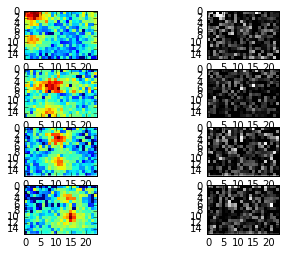

Epoch 42 of 200 took 0.416s
	training los:		0.0958
	training acc:		9.5682 %
Epoch 43 of 200 took 0.417s
	training los:		0.0955
	training acc:		9.5358 %
Epoch 44 of 200 took 0.414s
	training los:		0.0954
	training acc:		9.5428 %
Epoch 45 of 200 took 0.417s
	training los:		0.0954
	training acc:		9.4963 %
Epoch 46 of 200 took 0.418s
	training los:		0.0954
	training acc:		9.5333 %
Epoch 47 of 200 took 0.423s
	training los:		0.0948
	training acc:		9.4848 %
Epoch 48 of 200 took 0.417s
	training los:		0.0950
	training acc:		9.4998 %
Epoch 49 of 200 took 0.413s
	training los:		0.0948
	training acc:		9.4997 %
Epoch 50 of 200 took 0.416s
	training los:		0.0949
	training acc:		9.4614 %
Epoch 51 of 200 took 0.415s
	training los:		0.0948
	training acc:		9.5031 %
  validation loss:		0.093815
  validation accuracy:		9.38 %


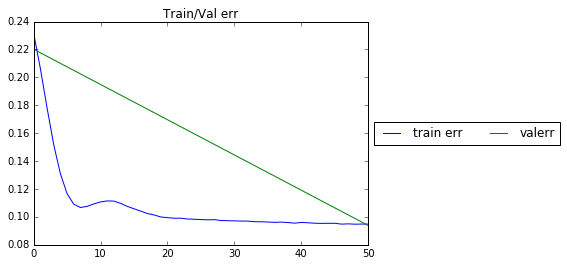

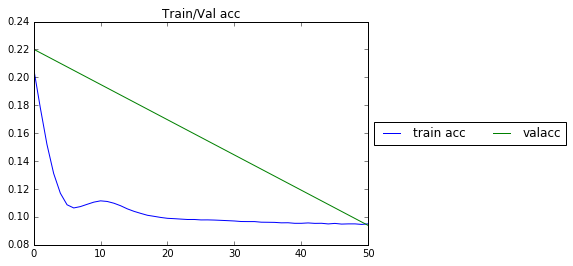

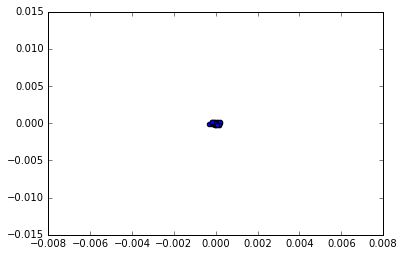

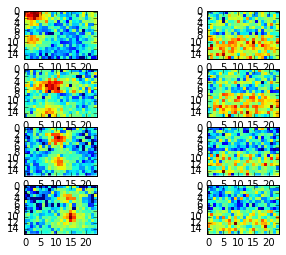

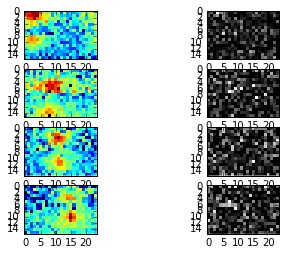

Epoch 52 of 200 took 0.417s
	training los:		0.0950
	training acc:		9.4569 %
Epoch 53 of 200 took 0.416s
	training los:		0.0947
	training acc:		9.4484 %
Epoch 54 of 200 took 0.415s
	training los:		0.0945
	training acc:		9.4502 %
Epoch 55 of 200 took 0.413s
	training los:		0.0946
	training acc:		9.4451 %
Epoch 56 of 200 took 0.414s
	training los:		0.0942
	training acc:		9.4511 %
Epoch 57 of 200 took 0.416s
	training los:		0.0943
	training acc:		9.4199 %
Epoch 58 of 200 took 0.420s
	training los:		0.0941
	training acc:		9.4094 %
Epoch 59 of 200 took 0.419s
	training los:		0.0941
	training acc:		9.4054 %
Epoch 60 of 200 took 0.414s
	training los:		0.0938
	training acc:		9.4045 %
Epoch 61 of 200 took 0.416s
	training los:		0.0940
	training acc:		9.3979 %


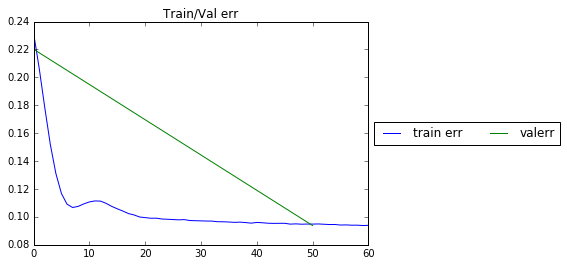

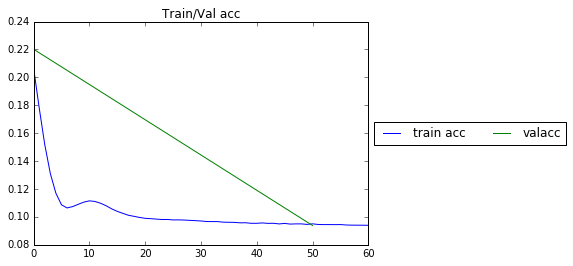

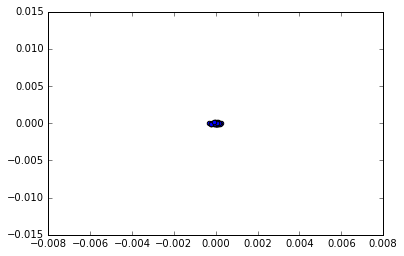

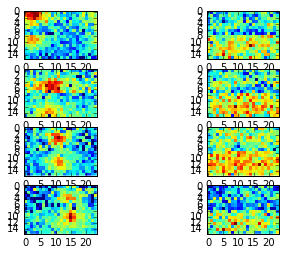

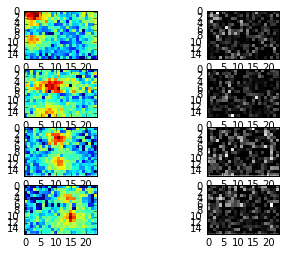

Epoch 62 of 200 took 0.418s
	training los:		0.0939
	training acc:		9.3887 %
Epoch 63 of 200 took 0.419s
	training los:		0.0941
	training acc:		9.3259 %
Epoch 64 of 200 took 0.422s
	training los:		0.0937
	training acc:		9.3845 %
Epoch 65 of 200 took 0.422s
	training los:		0.0936
	training acc:		9.3532 %
Epoch 66 of 200 took 0.421s
	training los:		0.0935
	training acc:		9.3149 %
Epoch 67 of 200 took 0.419s
	training los:		0.0938
	training acc:		9.3463 %
Epoch 68 of 200 took 0.423s
	training los:		0.0935
	training acc:		9.3434 %
Epoch 69 of 200 took 0.428s
	training los:		0.0932
	training acc:		9.3202 %
Epoch 70 of 200 took 0.418s
	training los:		0.0932
	training acc:		9.2801 %
Epoch 71 of 200 took 0.419s
	training los:		0.0930
	training acc:		9.3094 %


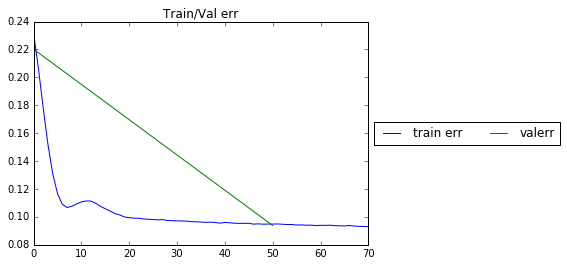

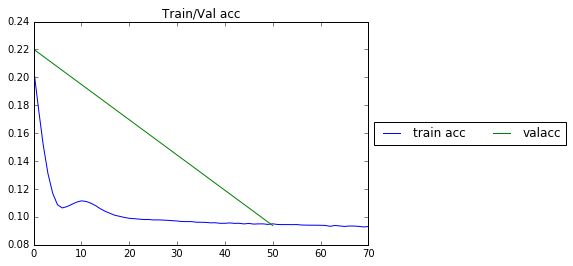

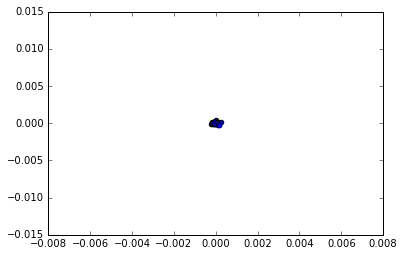

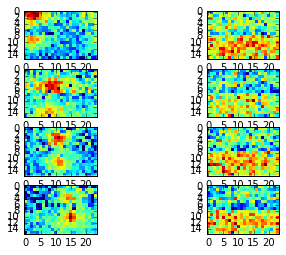

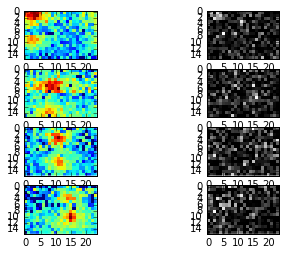

Epoch 72 of 200 took 0.423s
	training los:		0.0929
	training acc:		9.2943 %
Epoch 73 of 200 took 0.421s
	training los:		0.0930
	training acc:		9.2933 %
Epoch 74 of 200 took 0.424s
	training los:		0.0931
	training acc:		9.2877 %
Epoch 75 of 200 took 0.420s
	training los:		0.0926
	training acc:		9.2594 %
Epoch 76 of 200 took 0.420s
	training los:		0.0928
	training acc:		9.2787 %
Epoch 77 of 200 took 0.414s
	training los:		0.0927
	training acc:		9.2483 %
Epoch 78 of 200 took 0.419s
	training los:		0.0926
	training acc:		9.2576 %
Epoch 79 of 200 took 0.426s
	training los:		0.0928
	training acc:		9.2455 %
Epoch 80 of 200 took 0.422s
	training los:		0.0924
	training acc:		9.2048 %
Epoch 81 of 200 took 0.416s
	training los:		0.0922
	training acc:		9.2261 %


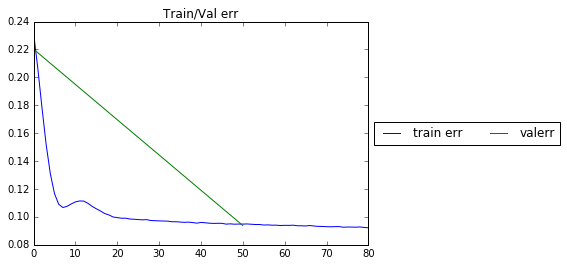

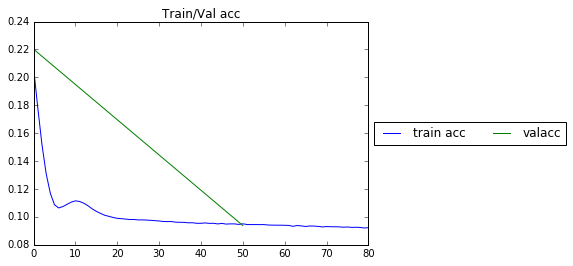

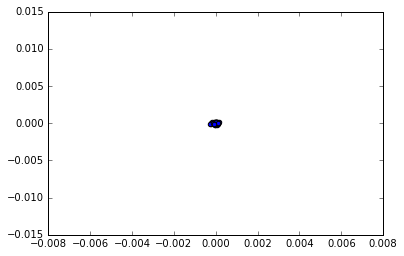

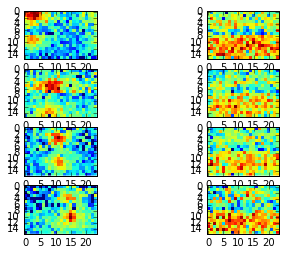

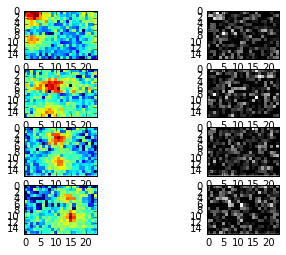

Epoch 82 of 200 took 0.439s
	training los:		0.0925
	training acc:		9.2167 %
Epoch 83 of 200 took 0.419s
	training los:		0.0925
	training acc:		9.1729 %
Epoch 84 of 200 took 0.428s
	training los:		0.0921
	training acc:		9.2152 %
Epoch 85 of 200 took 0.423s
	training los:		0.0920
	training acc:		9.2064 %
Epoch 86 of 200 took 0.426s
	training los:		0.0922
	training acc:		9.1885 %
Epoch 87 of 200 took 0.428s
	training los:		0.0921
	training acc:		9.1835 %
Epoch 88 of 200 took 0.431s
	training los:		0.0913
	training acc:		9.1597 %
Epoch 89 of 200 took 0.427s
	training los:		0.0915
	training acc:		9.1340 %
Epoch 90 of 200 took 0.426s
	training los:		0.0917
	training acc:		9.1396 %
Epoch 91 of 200 took 0.406s
	training los:		0.0916
	training acc:		9.1289 %


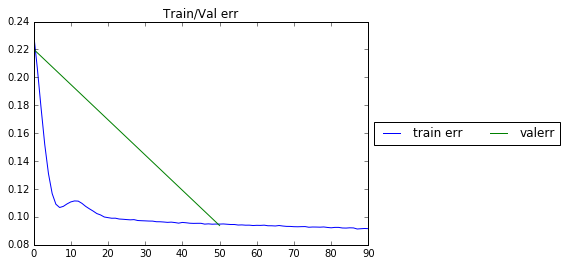

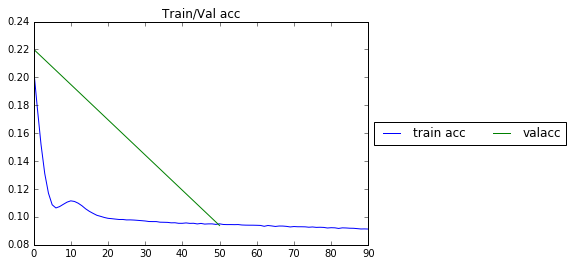

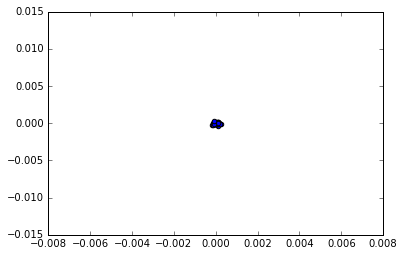

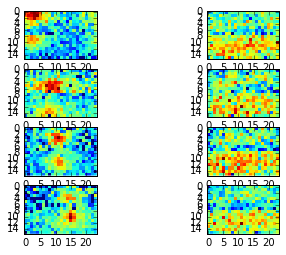

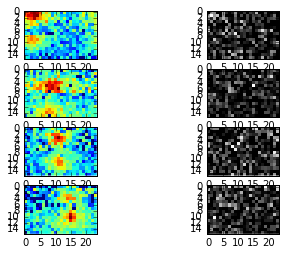

Epoch 92 of 200 took 0.434s
	training los:		0.0914
	training acc:		9.1439 %
Epoch 93 of 200 took 0.418s
	training los:		0.0915
	training acc:		9.1286 %
Epoch 94 of 200 took 0.416s
	training los:		0.0916
	training acc:		9.1234 %
Epoch 95 of 200 took 0.426s
	training los:		0.0911
	training acc:		9.0869 %
Epoch 96 of 200 took 0.419s
	training los:		0.0910
	training acc:		9.1031 %
Epoch 97 of 200 took 0.415s
	training los:		0.0911
	training acc:		9.1077 %
Epoch 98 of 200 took 0.416s
	training los:		0.0908
	training acc:		9.1005 %
Epoch 99 of 200 took 0.415s
	training los:		0.0910
	training acc:		9.0707 %
Epoch 100 of 200 took 0.415s
	training los:		0.0905
	training acc:		9.0823 %
Epoch 101 of 200 took 0.423s
	training los:		0.0904
	training acc:		9.0489 %
  validation loss:		0.090280
  validation accuracy:		9.03 %


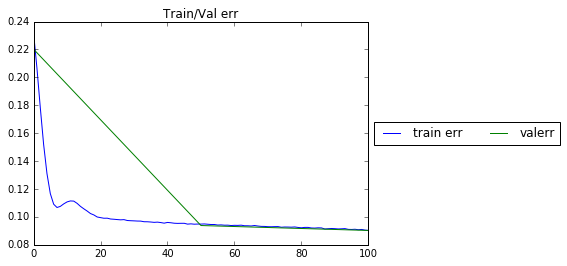

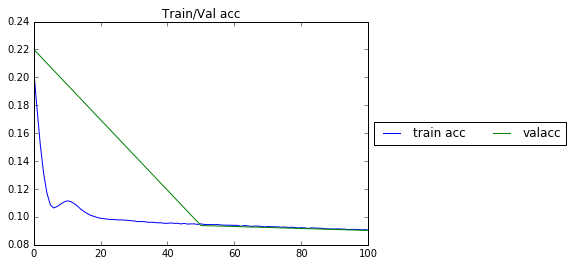

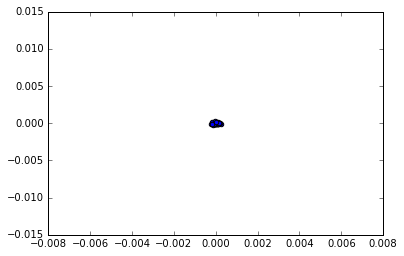

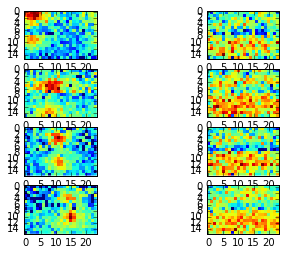

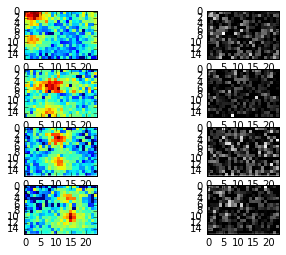

Epoch 102 of 200 took 0.416s
	training los:		0.0907
	training acc:		9.0561 %
Epoch 103 of 200 took 0.419s
	training los:		0.0903
	training acc:		9.0493 %
Epoch 104 of 200 took 0.422s
	training los:		0.0904
	training acc:		9.0481 %
Epoch 105 of 200 took 0.415s
	training los:		0.0902
	training acc:		9.0355 %
Epoch 106 of 200 took 0.411s
	training los:		0.0904
	training acc:		9.0324 %
Epoch 107 of 200 took 0.413s
	training los:		0.0903
	training acc:		9.0345 %
Epoch 108 of 200 took 0.412s
	training los:		0.0903
	training acc:		9.0056 %
Epoch 109 of 200 took 0.419s
	training los:		0.0904
	training acc:		9.0005 %
Epoch 110 of 200 took 0.415s
	training los:		0.0902
	training acc:		8.9862 %
Epoch 111 of 200 took 0.415s
	training los:		0.0902
	training acc:		8.9579 %


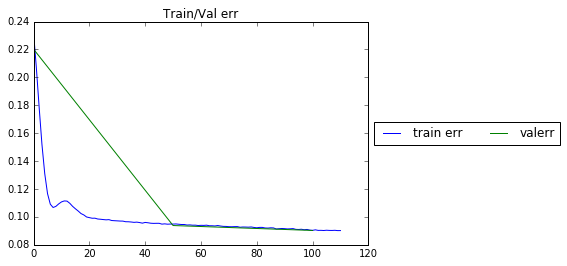

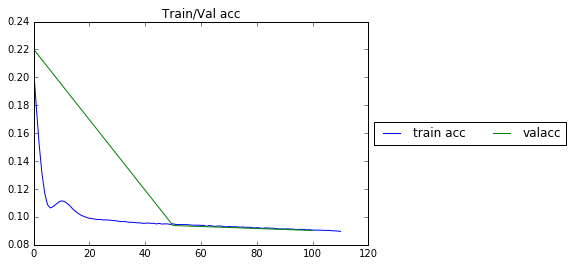

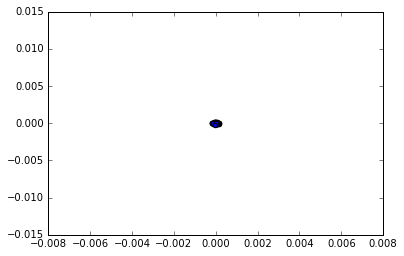

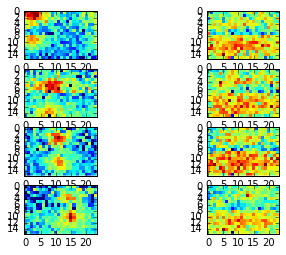

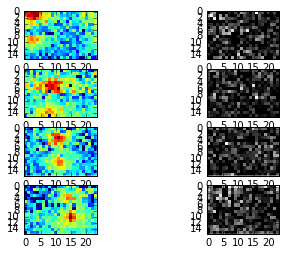

Epoch 112 of 200 took 0.420s
	training los:		0.0896
	training acc:		8.9665 %
Epoch 113 of 200 took 0.410s
	training los:		0.0896
	training acc:		8.9781 %
Epoch 114 of 200 took 0.412s
	training los:		0.0900
	training acc:		8.9369 %
Epoch 115 of 200 took 0.415s
	training los:		0.0896
	training acc:		8.9543 %
Epoch 116 of 200 took 0.410s
	training los:		0.0896
	training acc:		8.9136 %
Epoch 117 of 200 took 0.410s
	training los:		0.0890
	training acc:		8.9125 %
Epoch 118 of 200 took 0.410s
	training los:		0.0893
	training acc:		8.9093 %
Epoch 119 of 200 took 0.410s
	training los:		0.0888
	training acc:		8.8916 %
Epoch 120 of 200 took 0.410s
	training los:		0.0891
	training acc:		8.9058 %
Epoch 121 of 200 took 0.411s
	training los:		0.0889
	training acc:		8.8685 %


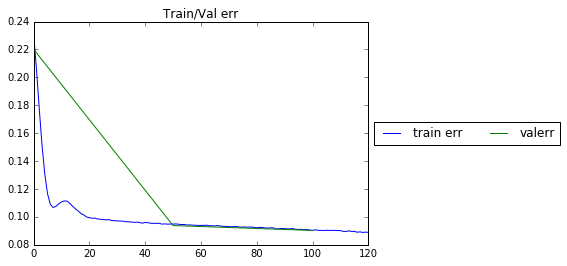

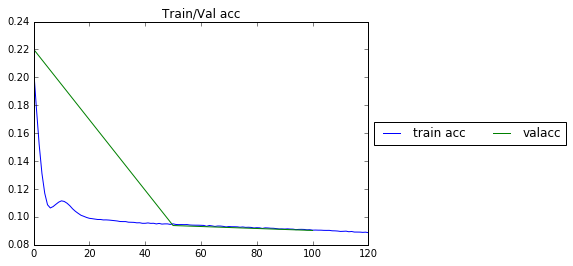

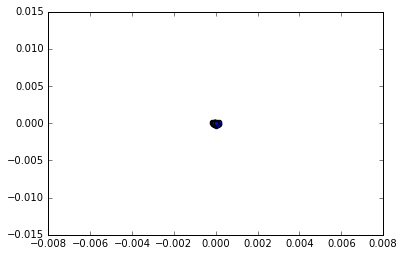

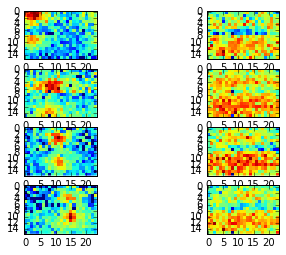

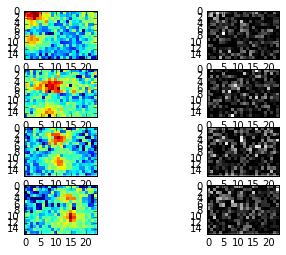

Epoch 122 of 200 took 0.318s
	training los:		0.0889
	training acc:		8.8575 %
Epoch 123 of 200 took 0.303s
	training los:		0.0889
	training acc:		8.8776 %
Epoch 124 of 200 took 0.303s
	training los:		0.0887
	training acc:		8.8739 %
Epoch 125 of 200 took 0.303s
	training los:		0.0885
	training acc:		8.8529 %
Epoch 126 of 200 took 0.304s
	training los:		0.0884
	training acc:		8.8383 %
Epoch 127 of 200 took 0.303s
	training los:		0.0885
	training acc:		8.8517 %
Epoch 128 of 200 took 0.304s
	training los:		0.0882
	training acc:		8.7833 %
Epoch 129 of 200 took 0.304s
	training los:		0.0884
	training acc:		8.7889 %
Epoch 130 of 200 took 0.307s
	training los:		0.0885
	training acc:		8.7797 %
Epoch 131 of 200 took 0.307s
	training los:		0.0882
	training acc:		8.7612 %


KeyboardInterrupt: 

In [4]:
    run_dir = create_run_dir()
    
    
    
    x_train, x_val, x_test = get_ibd_data(tot_num_pairs=kwargs['num_ims'], preprocess=True, just_charges=True)
    
    
    dca = DenoisingConvAe(save_dir=run_dir, network_kwargs=kwargs)

    dca.fit(x_train, x_train, x_val, x_val)
    
    